<a href="https://colab.research.google.com/github/Mrkomiljon/Datascience/blob/main/churn_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [12]:
df=pd.read_csv('https://raw.githubusercontent.com/Mrkomiljon/Datascience/497d713a32c9a0cbe243d9328cf4575790b41a45/churn_cleaned.csv')
df.head(6)

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total_Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,0,0,562,90003,327,33.964131,-118.272783,1,0,...,0,0,1,3,53.85,108.15,1,1,86,3239
1,1,0,0,562,90005,405,34.059281,-118.307420,0,0,...,0,0,1,2,70.70,151.65,1,1,67,2701
2,1,0,0,562,90006,393,34.048013,-118.293953,0,0,...,2,0,1,2,99.65,820.50,1,1,86,5372
3,1,0,0,562,90010,410,34.062125,-118.315709,0,0,...,2,0,1,2,104.80,3046.05,1,1,84,5003
4,1,0,0,562,90015,385,34.039224,-118.266293,1,0,...,2,0,1,0,103.70,5036.30,1,1,89,5340
5,1,0,0,562,90020,416,34.066367,-118.309868,0,0,...,0,0,0,1,55.20,528.35,1,1,78,5925


In [13]:
plt.figure(figsize=(21,14))
df.corr()['Churn Value'].sort_values(ascending = False)

Churn Label          1.000000
Churn Value          1.000000
Churn Score          0.664970
Monthly Charges      0.192858
Paperless Billing    0.191454
Senior Citizen       0.150541
Payment Method       0.107852
Multiple Lines       0.038043
Phone Service        0.011691
City                 0.008173
Longitude            0.004693
Zip Code             0.003006
Lat Long            -0.001177
Latitude            -0.003600
Gender              -0.008545
Streaming TV        -0.036303
Streaming Movies    -0.038802
Internet Service    -0.047097
CLTV                -0.128253
Partner             -0.149982
Device Protection   -0.177883
Online Backup       -0.195290
Total_Charges       -0.199484
Dependents          -0.248140
Tech Support        -0.282232
Online Security     -0.289050
Tenure Months       -0.354049
Contract            -0.396150
Count                     NaN
Country                   NaN
State                     NaN
Name: Churn Value, dtype: float64

<Figure size 1512x1008 with 0 Axes>

In [14]:
df.drop(['Count', 'Country', 'State', 'Churn Score', 'Churn Label', 'CLTV'], axis=1, inplace=True )
df.head()

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total_Charges,Churn Value
0,562,90003,327,33.964131,-118.272783,1,0,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
1,562,90005,405,34.059281,-118.307420,0,0,0,1,2,...,0,0,0,0,0,1,2,70.70,151.65,1
2,562,90006,393,34.048013,-118.293953,0,0,0,1,8,...,2,0,2,2,0,1,2,99.65,820.50,1
3,562,90010,410,34.062125,-118.315709,0,0,1,1,28,...,2,2,2,2,0,1,2,104.80,3046.05,1
4,562,90015,385,34.039224,-118.266293,1,0,0,1,49,...,2,0,2,2,0,1,0,103.70,5036.30,1


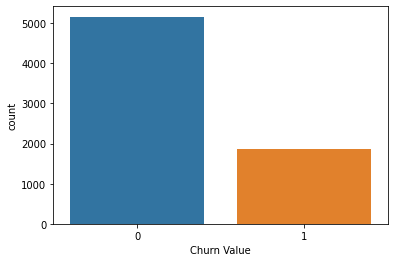

In [15]:
sns.countplot(x="Churn Value", data=df) # imbalance dataset

In [16]:
X = df.drop(columns = ['Churn Value'])
y = df['Churn Value'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify=y)

In [18]:
def distplot(feature, frame, color='g'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

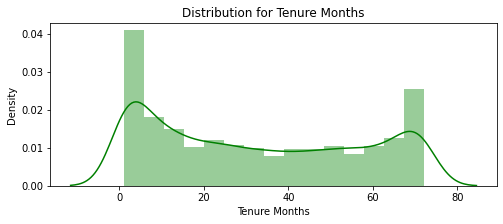

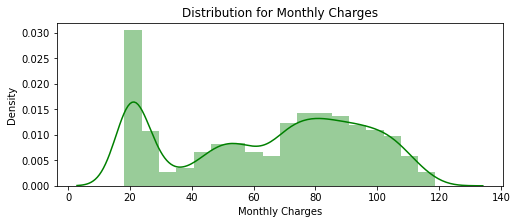

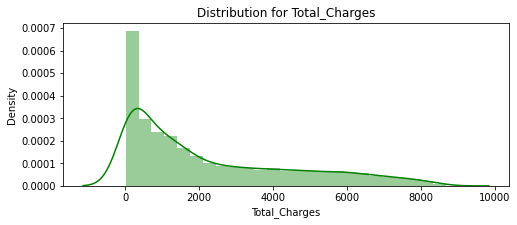

In [19]:
num_cols = ['Tenure Months', 'Monthly Charges', 'Total_Charges']
for feat in num_cols: distplot(feat, df)

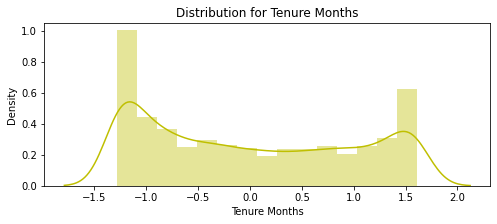

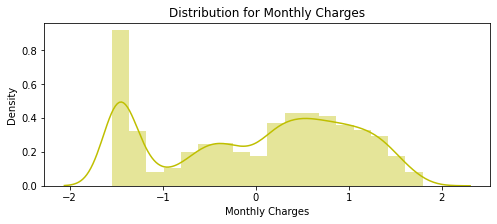

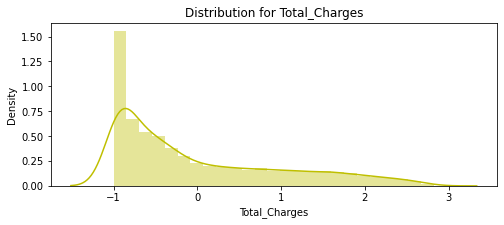

In [20]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in df_std: distplot(feat, df_std, color='y')

In [21]:
cat_cols_ohe =['Payment Method', 'Contract', 'Internet Service', 'Online Security', 'Paperless Billing', 'Senior Citizen','Tech Support','Dependents '] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [22]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [23]:
X.shape

(7032, 24)

In [24]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
X_encoded= pd.get_dummies(X,columns=['Payment Method', 'Contract', 'Internet Service', 'Online Security', 'Paperless Billing', 'Senior Citizen','Tech Support','Dependents'])
# Creating copy and stored in X variables
X=X_encoded.copy()
X.shape

(7032, 38)

In [26]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7938388625592417


In [27]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



In [28]:
from sklearn.svm import SVC
svm=SVC()
#Fit the model to the training dataset
svm.fit(X_train,y_train)
#Predict using the test set
predictions=svm.predict(X_test)
#instantiate Evaluation matrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1549    0]
 [ 561    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#Fit the model to the training set and predict using the test set
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
#Evaluation matrics
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1358  191]
 [ 295  266]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1549
           1       0.58      0.47      0.52       561

    accuracy                           0.77      2110
   macro avg       0.70      0.68      0.69      2110
weighted avg       0.76      0.77      0.76      2110



In [30]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7360189573459716


In [31]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1549
           1       0.50      0.51      0.51       561

    accuracy                           0.74      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.74      0.74      0.74      2110



In [32]:
# Lets build the Xgboost model without cross validation
import xgboost as xgb
clf_xgb= xgb.XGBClassifier(objective='binary:logistic',max_depth=5,learning_rate= 0.1,
                           colsample_bytree = 0.5,
                           subsample=0.90, reg_lambda= 10,use_label_encoder=False)

In [33]:
clf_xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.5567
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.581809
[2]	validation_0-aucpr:0.60132
[3]	validation_0-aucpr:0.611034
[4]	validation_0-aucpr:0.623114
[5]	validation_0-aucpr:0.624408
[6]	validation_0-aucpr:0.624319
[7]	validation_0-aucpr:0.630465
[8]	validation_0-aucpr:0.633763
[9]	validation_0-aucpr:0.632928
[10]	validation_0-aucpr:0.634126
[11]	validation_0-aucpr:0.633072
[12]	validation_0-aucpr:0.634568
[13]	validation_0-aucpr:0.636222
[14]	validation_0-aucpr:0.635712
[15]	validation_0-aucpr:0.634584
[16]	validation_0-aucpr:0.635512
[17]	validation_0-aucpr:0.637348
[18]	validation_0-aucpr:0.638413
[19]	validation_0-aucpr:0.638027
[20]	validation_0-aucpr:0.63842
[21]	validation_0-aucpr:0.63855
[22]	validation_0-aucpr:0.638608
[23]	validation_0-aucpr:0.639531
[24]	validation_0-aucpr:0.642145
[25]	validation_0-aucpr:0.642219
[26]	validation_0-aucpr:0.641895
[27]	validation_0-aucpr:0.64324
[28]	validation_0-aucpr:0.

XGBClassifier(colsample_bytree=0.5, max_depth=5, reg_lambda=10, subsample=0.9,
              use_label_encoder=False)

In [34]:
y_pred= clf_xgb.predict(X_test)

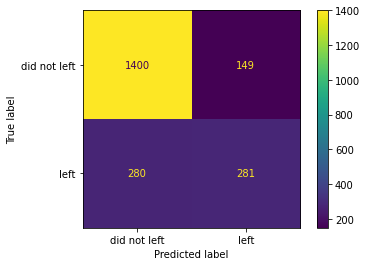

In [35]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(clf_xgb,X_test,y_test,values_format='d',display_labels=['did not left','left'])

In [36]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, make_scorer
print('The accuracy of the model is:',roc_auc_score(y_test,y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

The accuracy of the model is: 0.7023500872853395
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110




Grid Search calculates the performance for each combination of all the specified hyperparameters and their values and then chooses the optimum value for the hyperparameters. Based on the number of hyperparameters involved, this makes the processing time-consuming and costly.
It requires four arguments: estimator, param grid, cv, and scoring. The following is a list of the arguments:

In [37]:
#param grid — A dictionary containing lists of parameter values and parameter names as keys.
param_grid={'max_depth':[3,4,5],
            'gamma':[0,0.25,1.0],
            'learning_rate':[0.1,0.5,1.0],
            'reg_lambda':[1,10,20],
            'scale_pos_weight':[1,3,5],
    
}

In [38]:
# finding optimal parametr
from sklearn.model_selection import GridSearchCV
optimal_param= GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,
                                                        subsample=0.9,colsample_bytree=0.5,use_label_encoder=False),
                            param_grid=param_grid,
                            scoring='roc_auc',
                            verbose=2, 
                            cv=3)

In [39]:
# fitting the gridsearch
optimal_param.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)],verbose=False)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   0.2s
[CV] END g

GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.5, seed=42,
                                     subsample=0.9, use_label_encoder=False),
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 4, 5], 'reg_lambda': [1, 10, 20],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=2)

In [40]:
# Printing the best parameter
print(optimal_param.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 20, 'scale_pos_weight': 5}


In [41]:
# After getting the best parameter, now we will biuld the final classifier model
clf_classifier= xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=1.0,
                                  learning_rate=0.1,
                                  max_depth=3,
                                  reg_lambda=20,
                                  scale_pos_weight=5,
                                  subsample=0.9, 
                                  colsample_bytree=0.50,
                                  use_label_encoder=False)

In [42]:
# fitting the model
clf_classifier.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.51443
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.55669
[2]	validation_0-aucpr:0.577612
[3]	validation_0-aucpr:0.598648
[4]	validation_0-aucpr:0.593663
[5]	validation_0-aucpr:0.600018
[6]	validation_0-aucpr:0.601739
[7]	validation_0-aucpr:0.600512
[8]	validation_0-aucpr:0.600145
[9]	validation_0-aucpr:0.614348
[10]	validation_0-aucpr:0.616529
[11]	validation_0-aucpr:0.616843
[12]	validation_0-aucpr:0.615686
[13]	validation_0-aucpr:0.611474
[14]	validation_0-aucpr:0.61706
[15]	validation_0-aucpr:0.619247
[16]	validation_0-aucpr:0.623372
[17]	validation_0-aucpr:0.630745
[18]	validation_0-aucpr:0.630952
[19]	validation_0-aucpr:0.632753
[20]	validation_0-aucpr:0.634148
[21]	validation_0-aucpr:0.634445
[22]	validation_0-aucpr:0.633597
[23]	validation_0-aucpr:0.633729
[24]	validation_0-aucpr:0.636512
[25]	validation_0-aucpr:0.635721
[26]	validation_0-aucpr:0.632004
[27]	validation_0-aucpr:0.633945
[28]	validation_0-aucpr

XGBClassifier(colsample_bytree=0.5, gamma=1.0, reg_lambda=20,
              scale_pos_weight=5, subsample=0.9, use_label_encoder=False)

In [43]:
# Predicting the model
y_pred= clf_classifier.predict(X_test)

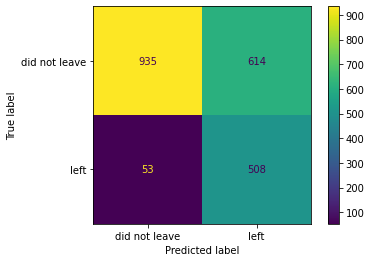

In [44]:
# Plotting the confusion matrics
plot_confusion_matrix(clf_classifier,X_test,y_test,values_format='d',display_labels=['did not leave','left'])

In [45]:
# Priting the accuracy and the model and classification report
print('The accuracy of the model:',roc_auc_score(y_test,y_pred))

The accuracy of the model: 0.7545705411691057


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.60      0.74      1549
           1       0.45      0.91      0.60       561

    accuracy                           0.68      2110
   macro avg       0.70      0.75      0.67      2110
weighted avg       0.82      0.68      0.70      2110



My own work!!!

```START
```



In [47]:
pip install tpot

     |████████████████████████████████| 87 kB 4.0 MB/s 
     |████████████████████████████████| 160 kB 48.1 MB/s 
     |████████████████████████████████| 173.6 MB 8.3 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=921ca9154851eaf9df658fbb41a7422fc8a5607cd3cfad579cc0cb539d54b333
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [48]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


In [49]:
# example of tpot for a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
# define dataset
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X, y)
# export the best model
model.export('tpot_best_model.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9399999999999998

Generation 2 - Current best internal CV score: 0.9399999999999998

Generation 3 - Current best internal CV score: 0.9399999999999998

Generation 4 - Current best internal CV score: 0.9399999999999998

Generation 5 - Current best internal CV score: 0.9399999999999998

Best pipeline: MLPClassifier(input_matrix, alpha=0.001, learning_rate_init=0.1)


In [50]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
# Average CV score on the training set was:  0.9433333333333334
exported_pipeline = GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features=0.1, min_samples_leaf=9, min_samples_split=8, n_estimators=100, subsample=1.0)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 1)
 
exported_pipeline.fit(X_train,y_train)
results = exported_pipeline.predict(X_test)

In [51]:
results.shape

(2110,)

In [ ]:
pip install mljar-supervised

In [ ]:
from supervised.automl import AutoML

In [ ]:
automl = AutoML(mode="Perform")
automl.fit(X_train, y_train)

# compute the accuracy on test data
predictions = automl.predict_all(X_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions["label"].astype(int)))